In [1]:
# Librerías a usar:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Leer archivo: 
df = pd.read_csv("Radar_Sensor_V2.dat") 

In [3]:
# Previsualización:
df.head()

,TOA5,CR300cellular,CR300,8544,CR310.Std.10.02,CPU:UniversidadCostaRica_Settings_V1.4.CR300,54689,NileData
0,TIMESTAMP,RECORD,Nile_Stage,Nile_Distance_ft,Nile_Status,Nile_Cable_V,CalculatedStage,NaN
1,TS,RN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Smp,Smp,Smp,Smp,Smp,NaN
3,2023-04-03 02:15:05,-10.41,10.41,0,12.9,-10.41,NaN,NaN
4,2023-04-03 02:30:05,-10.76,10.76,0,12.9,-10.76,NaN,NaN


In [4]:
# Información general:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63367 entries, 0 to 63366
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   TOA5                                          63366 non-null  object 
 1   CR300cellular                                 63366 non-null  object 
 2   CR300                                         63366 non-null  object 
 3   8544                                          63366 non-null  object 
 4   CR310.Std.10.02                               63366 non-null  object 
 5   CPU:UniversidadCostaRica_Settings_V1.4.CR300  63366 non-null  object 
 6   54689                                         62311 non-null  object 
 7   NileData                                      0 non-null      float64
dtypes: float64(1), object(7)
memory usage: 3.9+ MB


In [5]:
# Eliminar la última colunma:
df.drop(columns= ["NileData"], inplace = True)

In [6]:
# Verificación: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63367 entries, 0 to 63366
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   TOA5                                          63366 non-null  object
 1   CR300cellular                                 63366 non-null  object
 2   CR300                                         63366 non-null  object
 3   8544                                          63366 non-null  object
 4   CR310.Std.10.02                               63366 non-null  object
 5   CPU:UniversidadCostaRica_Settings_V1.4.CR300  63366 non-null  object
 6   54689                                         62311 non-null  object
dtypes: object(7)
memory usage: 3.4+ MB


In [7]:
# Identificar valores vacíos, NaN, ... y modificarlos: 
df.replace(["","Na", "NaN", "-",], pd.NA, inplace = True)

In [8]:
# Renombrar las columnas:
df.columns = ["Datetime", "Record", "Nile_Stage", "Nile_Distance", "Nile_Status", "Nile_Cable", "Calculated_Stage"] 

In [9]:
# Asignar valores float/Datetime: 
df["Datetime"] = pd.to_datetime(df["Datetime"], format = "%Y-%m-%d %H:%M:%S", errors = "coerce") 
df["Record"] = pd.to_numeric(df["Record"], errors = "coerce") 
df["Nile_Stage"] = pd.to_numeric(df["Nile_Stage"], errors = "coerce") 
df["Nile_Distance"] = pd.to_numeric(df["Nile_Distance"], errors = "coerce") 
df["Nile_Status"] = pd.to_numeric(df["Nile_Status"], errors = "coerce") 
df["Nile_Cable"] = pd.to_numeric(df["Nile_Cable"], errors = "coerce") 
df["Calculated_Stage"] = pd.to_numeric(df["Calculated_Stage"], errors = "coerce") 

In [10]:
# Verificación: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63367 entries, 0 to 63366
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          63364 non-null  datetime64[ns]
 1   Record            63364 non-null  float64       
 2   Nile_Stage        63362 non-null  float64       
 3   Nile_Distance     63364 non-null  float64       
 4   Nile_Status       63364 non-null  float64       
 5   Nile_Cable        63364 non-null  float64       
 6   Calculated_Stage  62307 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.4 MB


In [11]:
# Datos estadísticos temporales: 
df["Datetime"].describe()

count                            63364
mean     2024-05-01 06:51:09.657865728
min                2023-04-03 02:15:05
25%                2023-10-06 21:11:20
50%                2024-03-19 21:22:35
75%                2024-09-01 05:48:50
max                2025-08-07 11:00:05
Name: Datetime, dtype: object

In [12]:
#Verificación vacío temporal:
df["gap"] = df["Datetime"].diff()
print(df["gap"].max())

181 days 22:30:00


In [13]:
# Encontrar la fila con el mayor vacío:
idx_gap = df["gap"].idxmax()

# Mostrar la fecha justo antes y después del hueco:
print("Fecha antes del hueco:", df.loc[idx_gap - 1, "Datetime"])
print("Fecha después del hueco:", df.loc[idx_gap, "Datetime"])
print("Duración del hueco:", df.loc[idx_gap, "gap"])

Fecha antes del hueco: 2024-09-10 13:00:05
Fecha después del hueco: 2025-03-11 11:30:05
Duración del hueco: 181 days 22:30:00


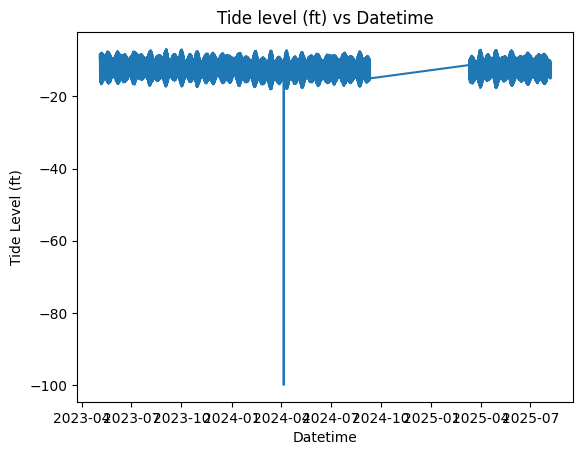

In [14]:
# Gráfica Tide Level (m) vs Datetime:
datetime = df["Datetime"]
tide_level = df["Calculated_Stage"] 
plt.plot(datetime, tide_level)
plt.xlabel("Datetime")
plt.ylabel("Tide Level (ft)")
plt.title("Tide level (ft) vs Datetime")
plt.show()

In [15]:
# Datos estadísticos Calculated Stage:
df["Calculated_Stage"].describe()

count    62307.000000
mean       -12.365312
std          2.313481
min       -100.000000
25%        -14.350000
50%        -12.370000
75%        -10.380000
max         -6.835000
Name: Calculated_Stage, dtype: float64

In [16]:
# El Nile Stage es la altura fija del sensor con respecto a un punto a referencia, un "datum".
# El sensor se colocó encima del datum por lo que los datos aparecen en negativo.
df["Nile_Stage"].describe()

count    63362.000000
mean       -11.956785
std          3.894891
min       -100.000000
25%        -14.320000
50%        -12.290000
75%        -10.300000
max         15.680000
Name: Nile_Stage, dtype: float64

In [17]:
# El mínimo de -100 no es un dato real. 

In [18]:
# Buscar ese dato: 
df[df["Nile_Stage"] == -100.00]

,Datetime,Record,Nile_Stage,Nile_Distance,Nile_Status,Nile_Cable,Calculated_Stage,gap
33271,2024-04-05 10:00:05,31943.0,-100.0,-100.0,1.0,13.8,-100.0,0 days 00:15:00


In [19]:
# Borrarlo:
df = df.drop(index=33271) 


In [20]:
# Verificación:
df["Nile_Stage"].describe()

count    63361.000000
mean       -11.955396
std          3.879184
min        -18.050000
25%        -14.320000
50%        -12.290000
75%        -10.300000
max         15.680000
Name: Nile_Stage, dtype: float64

In [21]:
# Verificación:
df["Calculated_Stage"].describe()

count    62306.000000
mean       -12.363905
std          2.286704
min        -18.050000
25%        -14.350000
50%        -12.370000
75%        -10.380000
max         -6.835000
Name: Calculated_Stage, dtype: float64

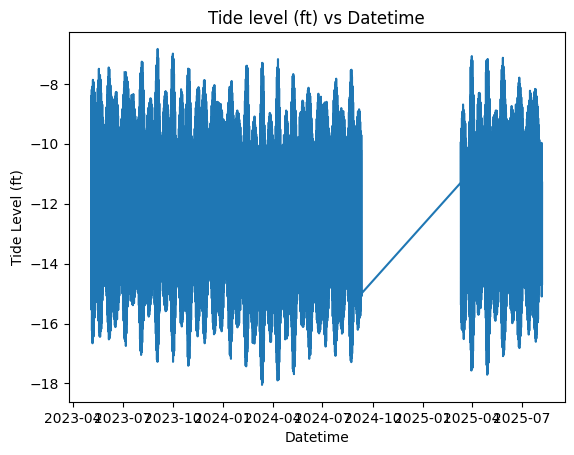

In [22]:
# Gráfica Tide Level (m) vs Datetime:
datetime = df["Datetime"]
tide_level = df["Calculated_Stage"] 
plt.plot(datetime, tide_level)
plt.xlabel("Datetime")
plt.ylabel("Tide Level (ft)")
plt.title("Tide level (ft) vs Datetime")
plt.show()

In [28]:
# Eliminar columnas no necesarias:
#df.drop(columns= ["gap"], inplace = True)
#df.drop(columns= ["error"], inplace = True)

In [29]:
# Verificación:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63366 entries, 0 to 63366
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime          63363 non-null  datetime64[ns]
 1   Record            63363 non-null  float64       
 2   Nile_Stage        63361 non-null  float64       
 3   Nile_Distance     63363 non-null  float64       
 4   Nile_Status       63363 non-null  float64       
 5   Nile_Cable        63363 non-null  float64       
 6   Calculated_Stage  62306 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.9 MB


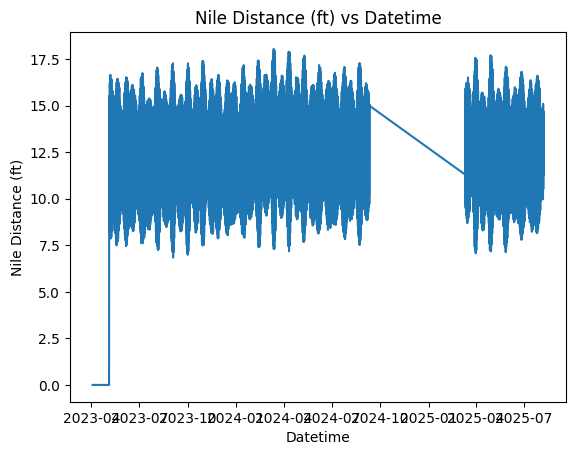

In [24]:
# Gráfica Nile Distance (ft) vs Datetime:
datetime = df["Datetime"]
tide_level = df["Nile_Distance"] 
plt.plot(datetime, tide_level)
plt.xlabel("Datetime")
plt.ylabel("Nile Distance (ft)")
plt.title("Nile Distance (ft) vs Datetime")
plt.show()

In [27]:
df["Nile_Distance"].describe()

count    63363.000000
mean        12.157902
std          2.765008
min          0.000000
25%         10.300000
50%         12.290000
75%         14.320000
max         18.050000
Name: Nile_Distance, dtype: float64